![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)

# **Proyecto: 'De las Comisiones a la Innovación: El Giro de Ignacio Yacurro'**

MDS7202: Laboratorio de Programación Científica para Ciencia de Datos

### Cuerpo Docente:

- Profesor: Sebastián Tinoco, Ignacio Meza De La Jara
- Auxiliar: Eduardo Moya Briones
- Ayudante: Nicolás Ojeda González, Melanie Peña Torres, Valentina Rojas Osorio

### Equipo: Ratas.py 🐁

- Geraldyn Pérez
- Diego Rojas

## Introducción

## Preprocesamiento

### Librerías necesarias

In [2]:
#!pip install pyarrow
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier




### Carga de los datos

In [3]:
X0=pd.read_parquet(r'Datos\competition_files\X_t0.parquet')
X0

,borrow_block_number,borrow_timestamp,wallet_address,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,...,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count
0,7711117,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973049.0,199,438,-239,0.397391,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1
1,7711123,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973188.0,200,439,-239,0.399063,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1
2,7711126,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973238.0,201,440,-239,0.400895,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1
3,7711672,1.557205e+09,0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6,1.557191e+09,1.557198e+09,13922.0,8,56,-48,0.604001,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1
4,7712572,1.557217e+09,0xbd9ed130a53cfafcf81502e4d35329a6c4d53410,1.557217e+09,1.557217e+09,264.0,2,3,-1,0.003008,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44291,10336599,1.593110e+09,0xa821dee44fe91e79535762a466f6a09fc6727891,1.592795e+09,1.593110e+09,315154.0,50,53,-3,0.280005,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1
44292,10336621,1.593110e+09,0xc25c5e0495287cc3a380703b2b665da5964d35ea,1.589820e+09,1.593110e+09,3290294.0,536,606,-70,5.723699,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1
44293,10336624,1.593110e+09,0xa0f75491720835b36edc92d06ddc468d201e9b73,1.568312e+09,1.593110e+09,24797983.0,393,423,-30,2.343277,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1
44294,10336627,1.593110e+09,0x07582f51171839586e42a46d4f68c70a5eb72f93,1.561659e+09,1.593110e+09,31451728.0,45,49,-4,0.331227,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1


In [5]:
y0=pd.read_parquet(r'Datos\competition_files\y_t0.parquet')
y0

,target
0,1
1,1
2,1
3,0
4,0
...,...
44291,1
44292,1
44293,0
44294,0


### Análisis exploratorio de datos

In [6]:
## numerico
columnas = X0.columns

X0.describe()

,borrow_block_number,borrow_timestamp,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,...,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count
count,4.429600e+04,4.429600e+04,4.429600e+04,4.429600e+04,4.429600e+04,44296.000000,44296.000000,44296.000000,44296.000000,44296.000000,...,44296.000000,44296.000000,44296.000000,44296.000000,44296.000000,44296.000000,44296.000000,44296.000000,44296.000000,44296.000000
mean,9.343121e+06,1.579559e+09,1.550122e+09,1.579501e+09,2.943773e+07,999.369514,1360.256231,-360.886717,2.717345,0.002874,...,1.577302,-0.717461,5.533406,22.260178,34.435369,0.267880,-0.006844,0.993156,0.846758,0.970268
std,7.772108e+05,1.070282e+07,2.936277e+07,1.071609e+07,2.897753e+07,3065.153260,3936.526950,2167.545039,13.380028,0.008137,...,10.362093,0.064708,1.532826,9.163070,18.010626,8.010179,0.153774,0.153774,0.360225,0.169848
min,7.711117e+06,1.557197e+09,1.438270e+09,1.557197e+09,1.370000e+02,1.000000,0.000000,-68013.000000,0.000000,0.000000,...,-25.740436,-0.895911,3.089819,6.297847,5.413265,-29.248726,-0.545814,0.454186,0.000000,0.000000
25%,8.638256e+06,1.569687e+09,1.522918e+09,1.569553e+09,3.641601e+06,34.000000,52.000000,-198.000000,0.076647,0.000937,...,-6.681407,-0.736622,4.520733,15.789090,20.398524,-4.305614,-0.073433,0.926567,1.000000,1.000000
50%,9.470717e+06,1.581544e+09,1.558756e+09,1.581499e+09,1.900256e+07,134.000000,207.000000,-49.000000,0.349336,0.001550,...,4.145440,-0.736622,5.229391,19.489917,30.411080,0.303495,-0.011708,0.988292,1.000000,1.000000
75%,1.008743e+07,1.589770e+09,1.573658e+09,1.589671e+09,5.196818e+07,471.000000,678.000000,-8.000000,1.406124,0.002773,...,8.143114,-0.668565,6.303838,27.579281,43.521182,5.438241,0.072939,1.072939,1.000000,1.000000
max,1.033663e+07,1.593110e+09,1.593109e+09,1.593151e+09,1.540836e+08,98747.000000,71087.000000,97831.000000,506.170766,0.415178,...,24.356935,-0.565216,11.588088,56.729534,108.686030,19.424855,0.534402,1.534402,1.000000,1.000000


In [7]:
X0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44296 entries, 0 to 44295
Data columns (total 77 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   borrow_block_number                      44296 non-null  int64  
 1   borrow_timestamp                         44296 non-null  float64
 2   wallet_address                           44296 non-null  object 
 3   first_tx_timestamp                       44296 non-null  float64
 4   last_tx_timestamp                        44296 non-null  float64
 5   wallet_age                               44296 non-null  float64
 6   incoming_tx_count                        44296 non-null  int64  
 7   outgoing_tx_count                        44296 non-null  int64  
 8   net_incoming_tx_count                    44296 non-null  int64  
 9   total_gas_paid_eth                       44296 non-null  float64
 10  avg_gas_paid_per_tx_eth                  44296

In [8]:
## Heatmap 
df= pd.concat([X0, y], axis=1)
correlacion = df.select_dtypes(include=['float64', 'int64']).corr()


# Crear el heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlacion,annot=False, cmap='coolwarm', linewidths=0.5)

# Mostrar el gráfico
plt.title("Mapa de Correlación")
plt.show()

NameError: name 'y' is not defined

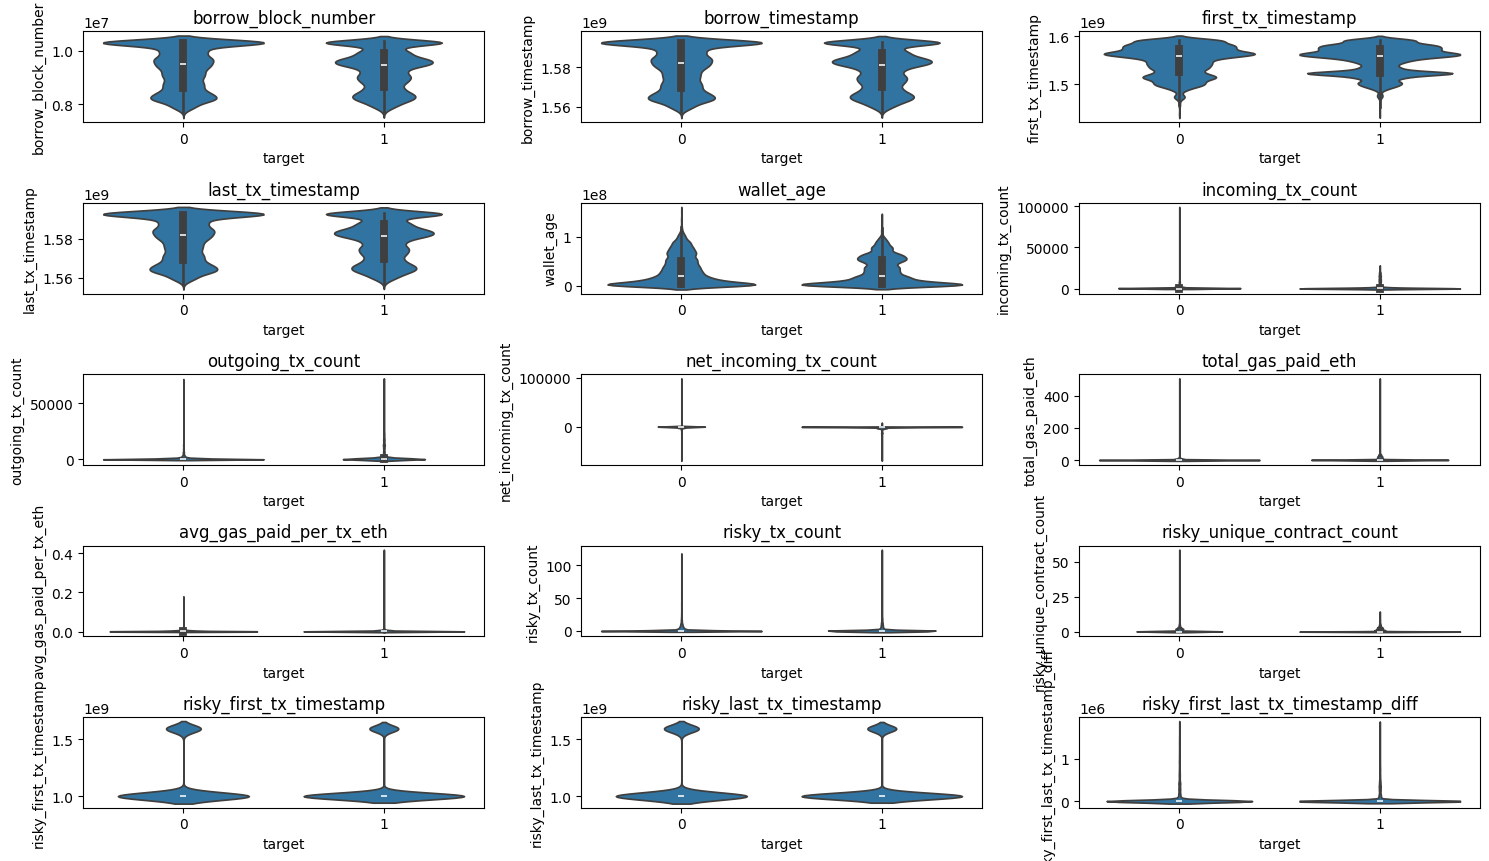

In [ ]:
## Violinplots
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns[:15]

# Crear un violinplot para cada variable numérica según 'target'
plt.figure(figsize=(15,10))  # Establecer el tamaño de la figura

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  # Ajustar el número de filas y columnas
    sns.violinplot(x='target', y=col, data=df)  # Usar df completo como data
    plt.title(f'{col}')
    plt.xlabel('target')

plt.tight_layout()  # Ajustar el espaciado
plt.show()

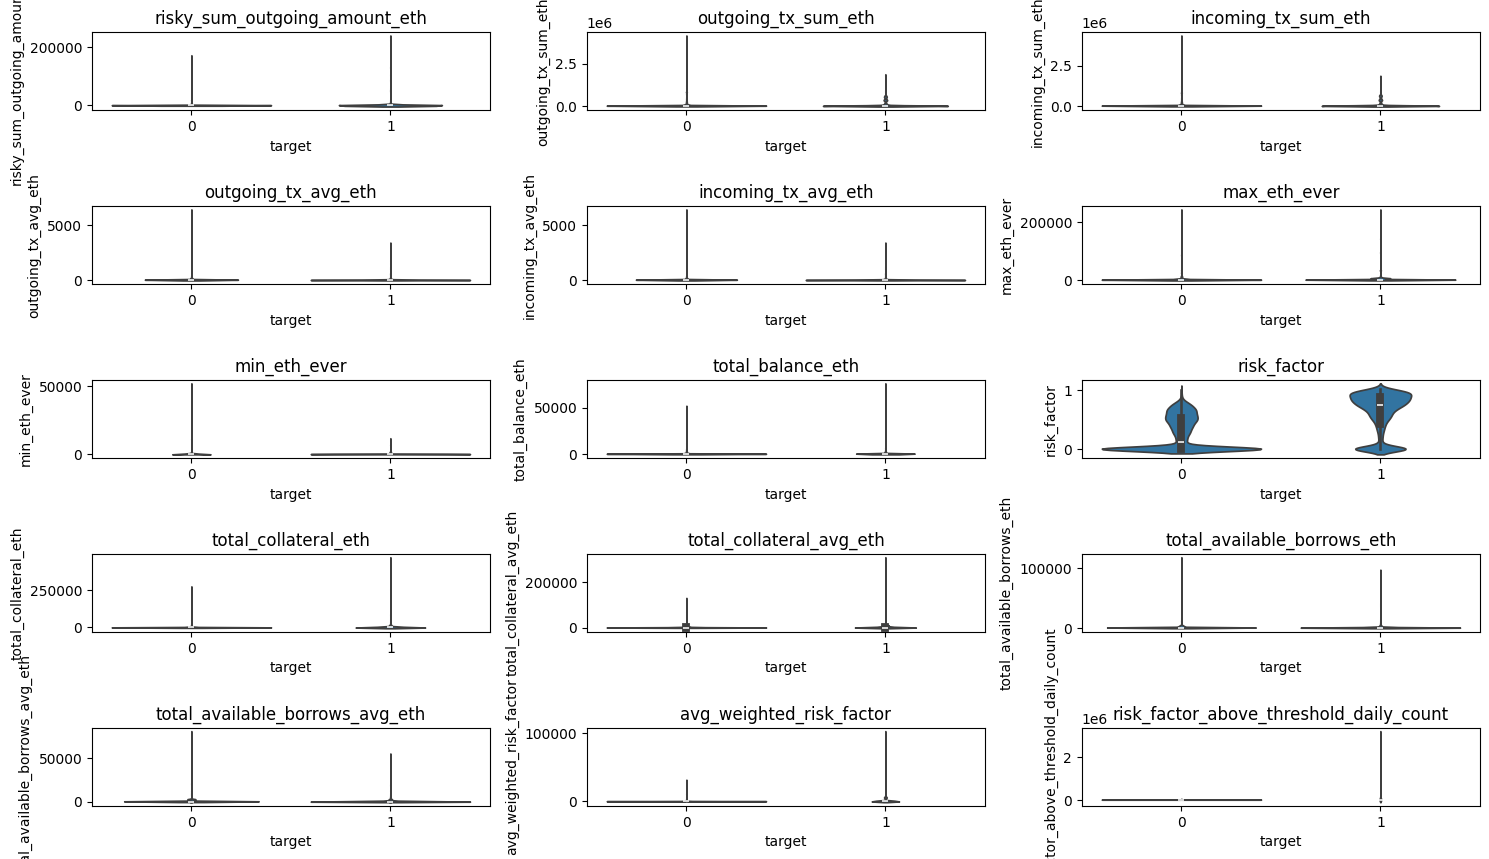

In [ ]:
# Seleccionar las columnas numéricas del DataFrame original
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns[15:30]

# Establecer el tamaño de la figura
plt.figure(figsize=(15, 10))

# Crear un violinplot para cada variable numérica según 'target'
for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols) // 3) + 1, 3, i + 1)  # Ajustar el número de filas y columnas
    sns.violinplot(x='target', y=col, data=df)  # Crear un violin plot
    plt.title(f'{col}')
    plt.xlabel('target')

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

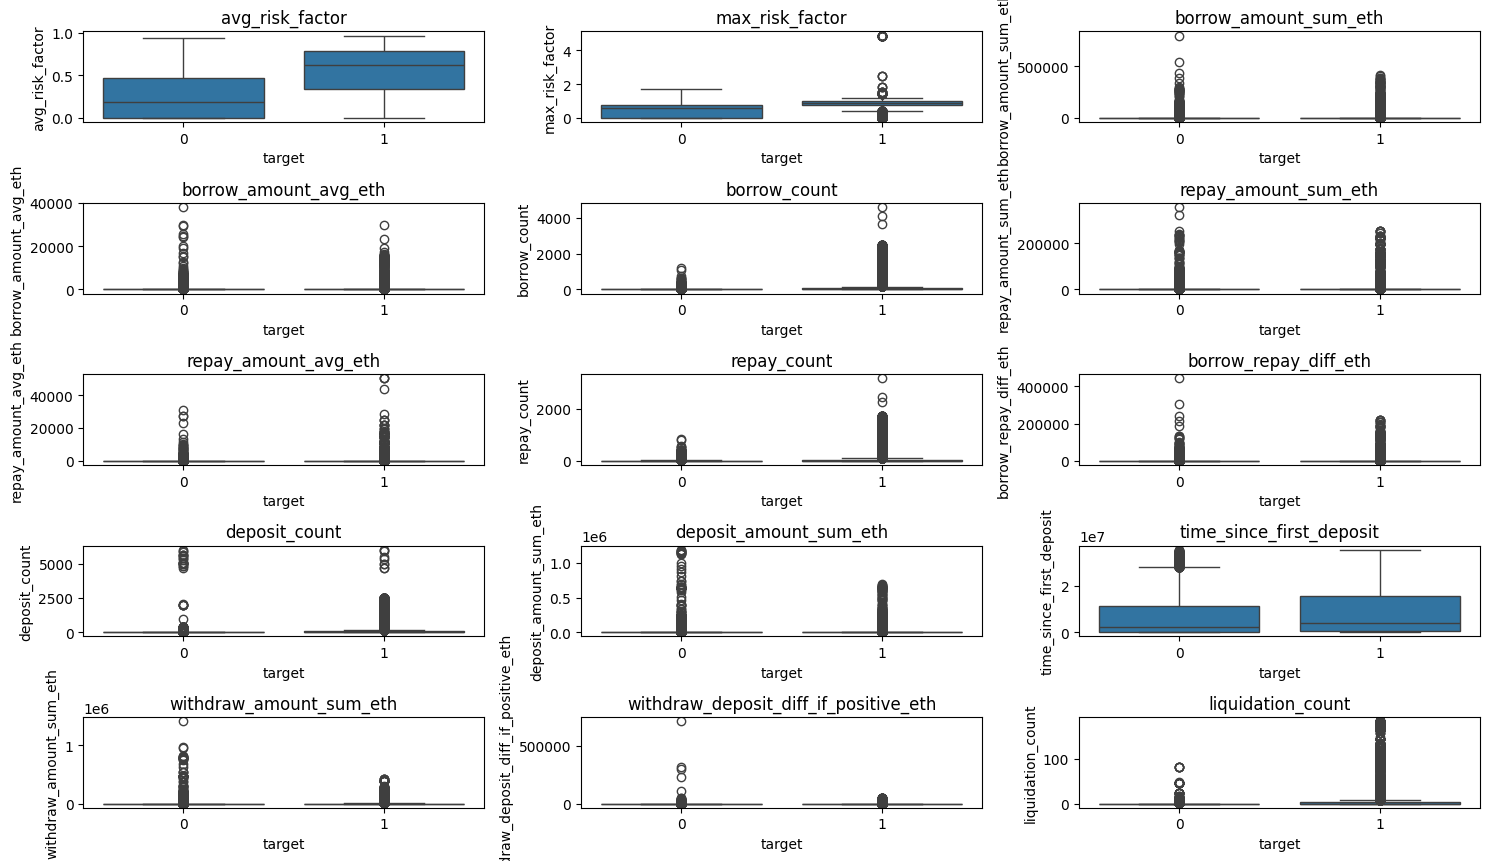

In [ ]:
## Boxplots
# Seleccionar las columnas numéricas del DataFrame original
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns[30:45]

# Crear un boxplot para cada variable numérica según 'target'
plt.figure(figsize=(15,10))  # Establecer el tamaño de la figura

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  # Ajustar el número de filas y columnas
    sns.boxplot(x='target', y=col, data=df)  # Usar df completo como data
    plt.title(f'{col}')
    plt.xlabel('target')

plt.tight_layout()  # Ajustar el espaciado
plt.show()

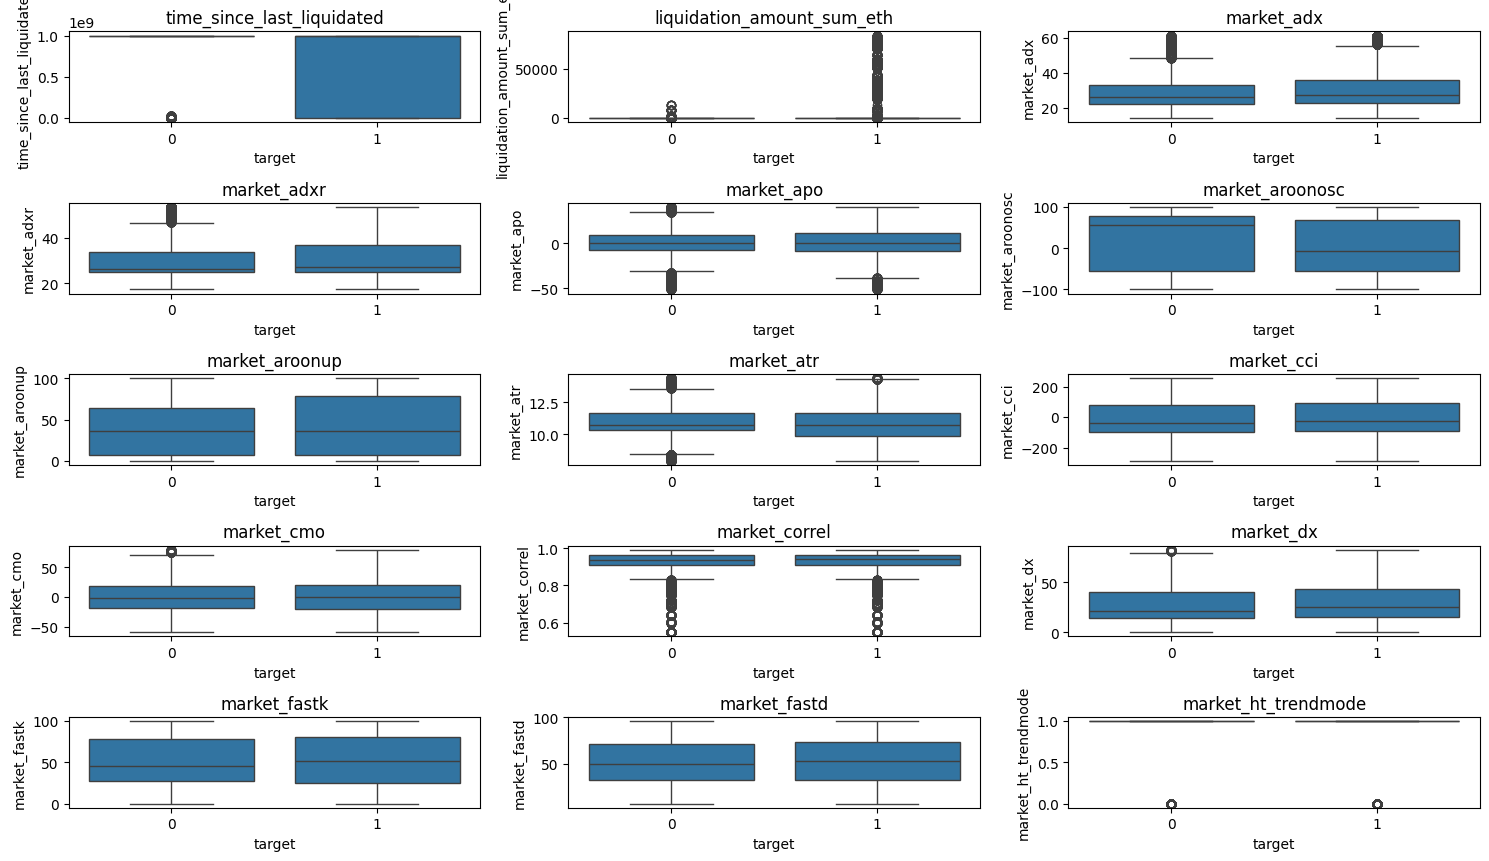

In [ ]:
# Seleccionar las columnas numéricas del DataFrame original
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns[45:60]

# Crear un boxplot para cada variable numérica según 'target'
plt.figure(figsize=(15,10))  # Establecer el tamaño de la figura

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  # Ajustar el número de filas y columnas
    sns.boxplot(x='target', y=col, data=df)  # Usar df completo como data
    plt.title(f'{col}')
    plt.xlabel('target')

plt.tight_layout()  # Ajustar el espaciado
plt.show()

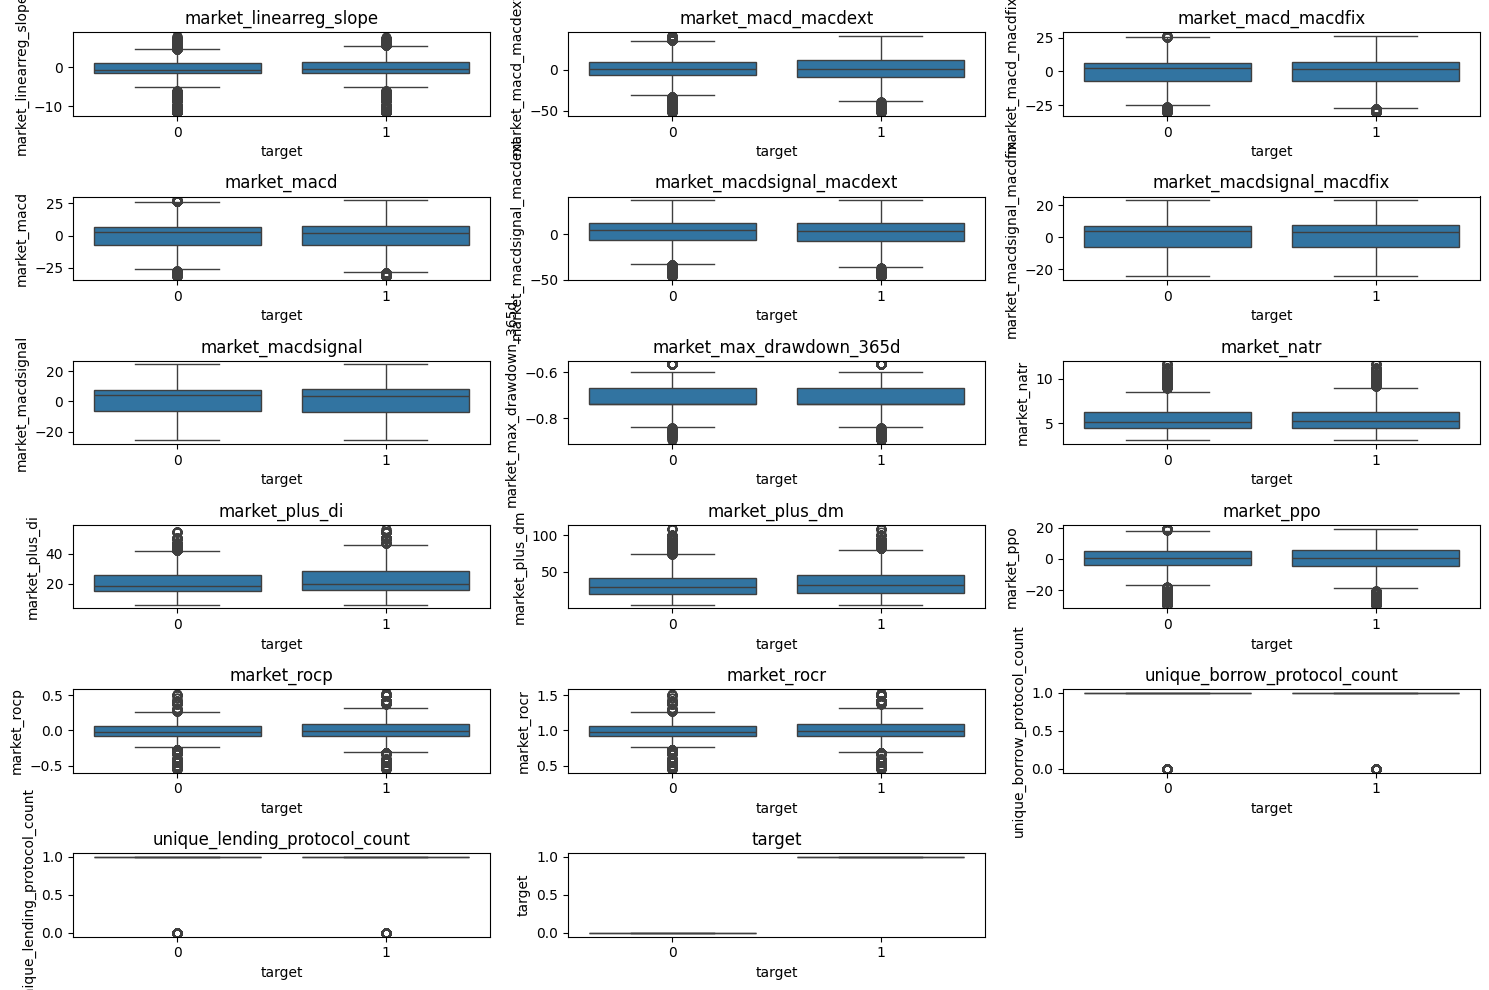

In [ ]:
# Seleccionar las columnas numéricas del DataFrame original
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns[60:]

# Crear un boxplot para cada variable numérica según 'target'
plt.figure(figsize=(15,10))  # Establecer el tamaño de la figura

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  # Ajustar el número de filas y columnas
    sns.boxplot(x='target', y=col, data=df)  # Usar df completo como data
    plt.title(f'{col}')
    plt.xlabel('target')

plt.tight_layout()  # Ajustar el espaciado
plt.show()

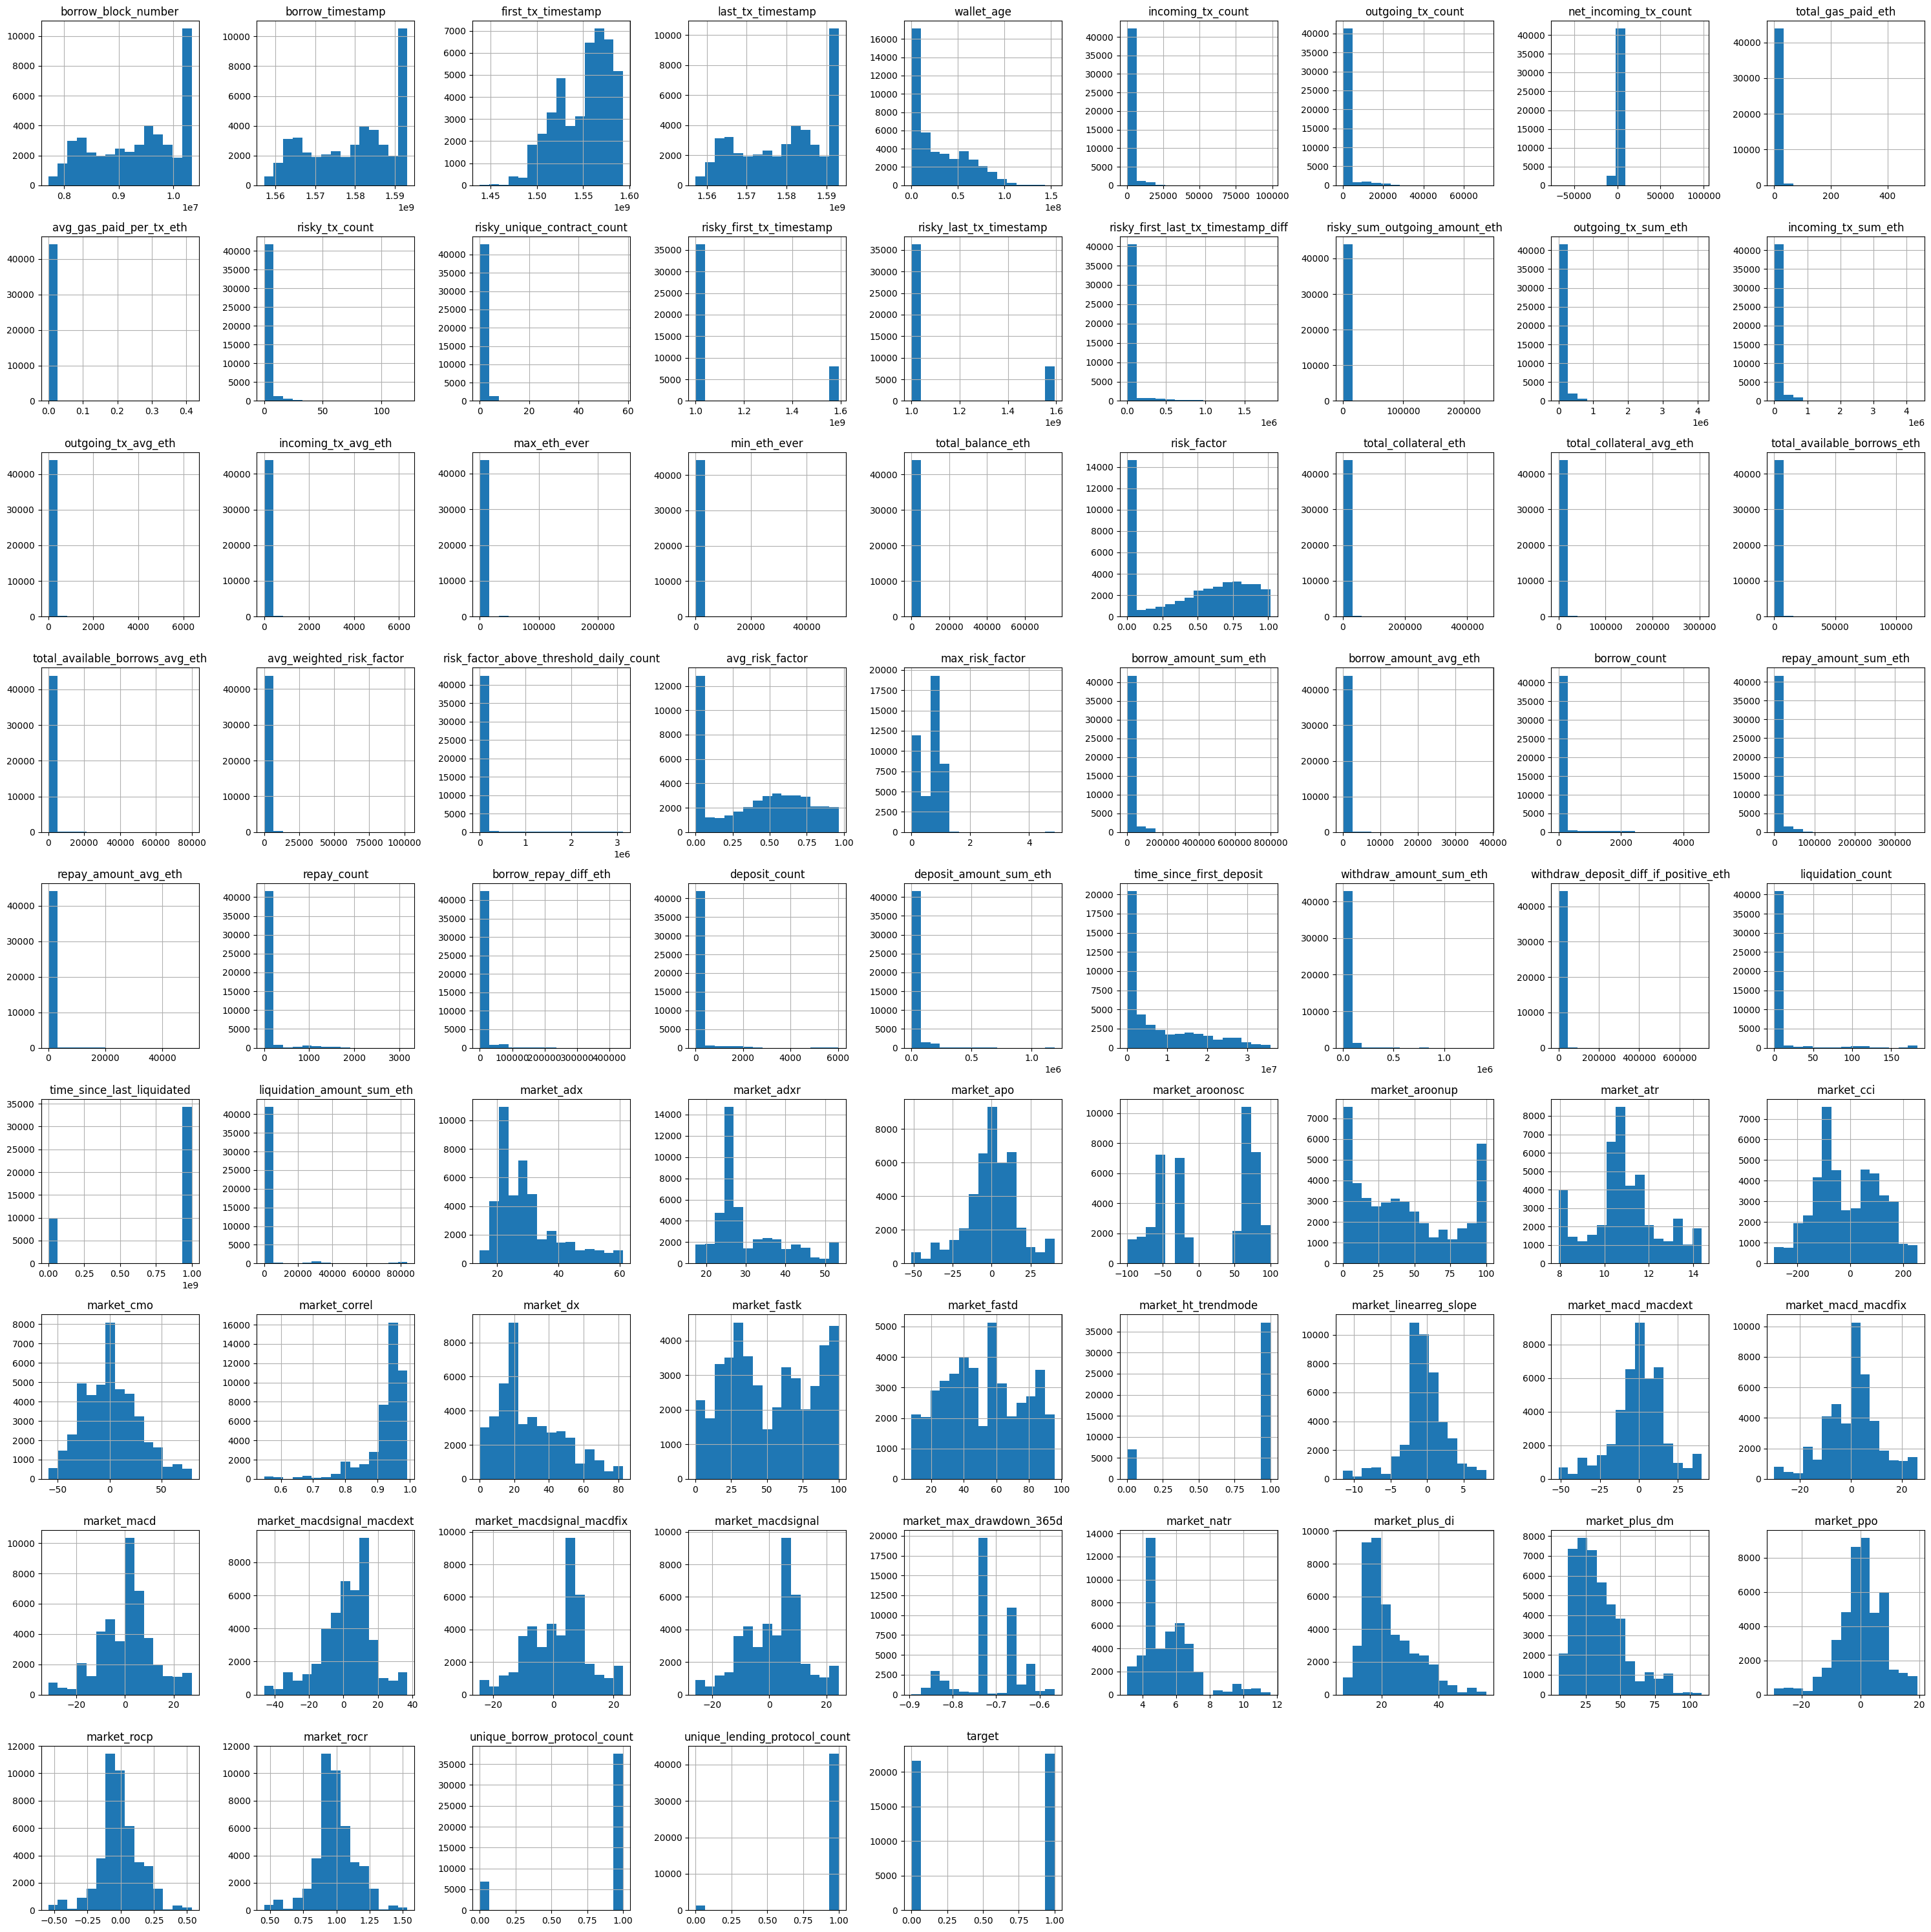

In [ ]:
## Histogramas
df.hist(bins=15, figsize=(30, 30))
plt.tight_layout()
plt.show()

### Preprocesamiento de datos

In [14]:
ys = ['target']
binary_columns = ['market_ht_trendmode', 'unique_borrow_protocol_count', 'unique_lending_protocol_count']
id_columns = ['borrow_block_number', 'wallet_address']
time_columns = [
    'risky_first_tx_timestamp', 'risky_last_tx_timestamp', 'risky_first_last_tx_timestamp_diff',
    'time_since_first_deposit', 'time_since_last_liquidated'
]
timestamp_ms_columns = ['borrow_timestamp', 'first_tx_timestamp', 'last_tx_timestamp']

# Columnas a escalar
columns_to_scale = list(X0.columns.difference(id_columns + binary_columns + timestamp_ms_columns + time_columns + ys))

# Configurar el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), columns_to_scale),
        ('passthrough', 'passthrough', id_columns + binary_columns + time_columns)
    ]
)

## Modelamiento

### División del conjunto de datos

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X0, y0, test_size=0.3, stratify=y0,random_state=17)

### Creación de un modelo baseline

In [15]:
pipeline = Pipeline([
    ('Preprocessing', preprocessor),
    ('BaseLine', DummyClassifier(strategy='most_frequent'))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['avg_gas_paid_per_tx_eth',
                                                   'avg_risk_factor',
                                                   'avg_weighted_risk_factor',
                                                   'borrow_amount_avg_eth',
                                                   'borrow_amount_sum_eth',
                                                   'borrow_count',
                                                   'borrow_repay_diff_eth',
                                                   'deposit_amount_sum_eth',
                                                   'deposit_count',
                                                   'incoming_tx_avg_eth',
                                                   'incoming_tx_count',
                                                   'incoming_tx_sum...
                                                 ('passthrough', 'passthrough',
                                                  ['borrow_block_number',
                                                   'wallet_address',
                                                   'market_ht_trendmode',
                                                   'unique_borrow_protocol_count',
                                                   'unique_lending_protocol_count',
                                                   'risky_first_tx_timestamp',
                                                   'risky_last_tx_timestamp',
                                                   'risky_first_last_tx_timestamp_diff',
                                                   'time_since_first_deposit',
                                                   'time_since_last_liquidated'])])),
                ('BaseLine', DummyClassifier(strategy='most_frequent'))])

### Desarrollo de 3 modelos de Machine Learning

### Optimización de modelos

- ¿Qué métricas decidieron optimizar?¿Por qué?
- ¿Cuanto tiempo le destinaron a esta etapa? ¿Existen indicios de que resultados puedan mejoraar destinando más tiempo?
- ¿Qué hiperparámetro tuvo un mayor impacto en el preformance de su modelo?

### Interpretabilidad del modelo con mejores resultados

### Interpretabilidad

- ¿Podría explicar el funcionamiento de su modelo para una predicción en particular? Si es así, explique 3 ejemplos.
- ¿Qué atributo tiene una mayor importancia en la salida de su modelo? ¿Tiene esto sentido con el problema de negocio?
- ¿Existe alguna interacción entre atributos que sea relevante para el modelo?
- ¿Podría existir sesgo hacia algún atributo en particular? ¿Cuál?

## MLOps

### Tracking con MLFlow

### Desarrollo de Aplicación Web

### Monitoreo

### Canalizaciones Productivas

## Resultados

## Conclusiones